# Ejemplos de preprocesamiento de imágenes

In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('./data/test_ships.json') as json_data:
    test_d = json.load(json_data)

In [3]:
def reshape_data(dictionary):
    data = []
    for fimg in dictionary['data']:
        data.append(np.array([[fimg[ii],fimg[ii+6400],fimg[ii+12800]] for ii in range(6400)], dtype=np.uint8).reshape([80,80,3]))
    return np.array(data, dtype=np.uint8), np.array(dictionary['labels'], dtype=np.uint8)

In [4]:
test_images, test_labels = reshape_data(test_d)

Esta imagen sí tiene un barco


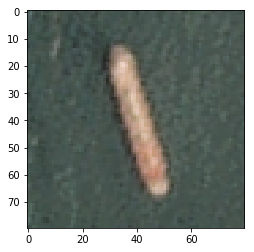

In [56]:
ii = 50
print(f"Esta imagen {'sí' if test_labels[ii] else 'no'} tiene un barco")
plt.imshow(test_images[ii])

## OpenCV

```bash
$ pip install opencv-python
```

### To Grayscale

In [19]:
import cv2

In [28]:
mod_image = cv2.cvtColor(test_images[50], cv2.COLOR_RGB2GRAY)

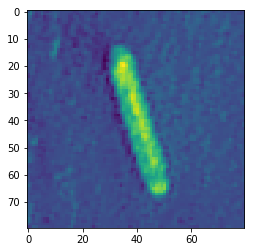

In [29]:
plt.imshow(mod_image)

### Find edges

(<matplotlib.axes._subplots.AxesSubplot at 0x12e589e10>,
 <matplotlib.image.AxesImage at 0x12e5d0ba8>)

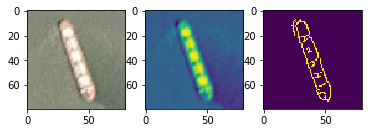

In [63]:
# load the image from disk, convert it to grayscale, blur it,
# and apply edge detection to reveal the outline of the ship
ii=462
#ii=112
gr = cv2.cvtColor(test_images[ii], cv2.COLOR_BGR2GRAY)
gr = cv2.GaussianBlur(gr, (3, 3), 0)
edged = cv2.Canny(gr, 100, 200)
plt.subplot(131),plt.imshow(test_images[ii])
plt.subplot(132),plt.imshow(gr)
plt.subplot(133),plt.imshow(edged)

### Rotations and Zoom

(<matplotlib.axes._subplots.AxesSubplot at 0x12e9d6828>,
 <matplotlib.image.AxesImage at 0x12ea32438>)

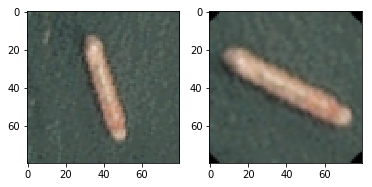

In [67]:
ii=50
deg = 45
zoom = 1.3
rot45_data = []
rows,cols = 80,80
M = cv2.getRotationMatrix2D((cols/2,rows/2),deg,zoom)
rot_image = cv2.warpAffine(test_images[ii],M,(cols,rows))

plt.subplot(121),plt.imshow(test_images[ii])
#plt.subplot(132),plt.imshow(gr)
plt.subplot(122),plt.imshow(rot_image)

### Mirror

(<matplotlib.axes._subplots.AxesSubplot at 0x12cff84a8>,
 <matplotlib.image.AxesImage at 0x12d051240>)

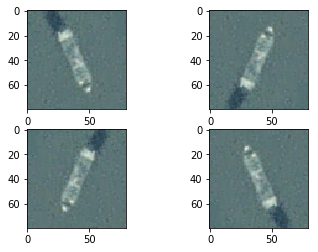

In [44]:
ii = 40
img = test_images[ii]
horizontal_img = cv2.flip( img, 0 )
vertical_img = cv2.flip( img, 1 )
both_img = cv2.flip( img, -1 )
plt.subplot(221),plt.imshow(img)
plt.subplot(222),plt.imshow(horizontal_img)
plt.subplot(223),plt.imshow(vertical_img)
plt.subplot(224),plt.imshow(both_img)

### Denoising

https://docs.opencv.org/3.3.1/d5/d69/tutorial_py_non_local_means.html

https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_filtering/py_filtering.html

(<matplotlib.axes._subplots.AxesSubplot at 0x12d9579e8>,
 <matplotlib.image.AxesImage at 0x12da27940>)

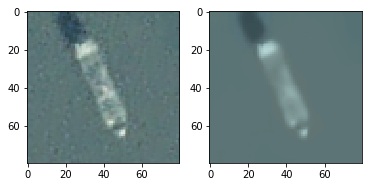

In [51]:
ii = 40
img = test_images[ii]
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)

(<matplotlib.axes._subplots.AxesSubplot at 0x12d66f5f8>,
 <matplotlib.image.AxesImage at 0x12db82400>)

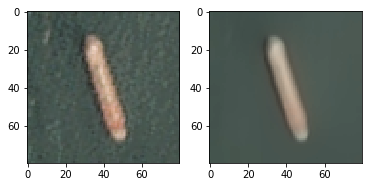

In [52]:
ii = 50
img = test_images[ii]
dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(dst)